# Importing Libraries


In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from scipy.stats import skew
from scipy import stats
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,normalize
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score,precision_score,roc_curve,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score,precision_score,roc_auc_score,roc_curve,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import SGDClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import f_regression,SelectKBest
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier
from mlxtend.classifier import StackingClassifier

# Read CSV

In [2]:
df=pd.read_csv('adult.csv')

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df["income"].replace({"<=50K": 0, ">50K": 1}, inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [7]:
# plt.bar(data=df,x="income",width=0.4,height=1)

In [8]:
for i in df:
    print("..",i,"..")
    print(pd.unique(sorted(df[i])))

# age - data of people from younger(17) to oldest (90) is taken consideration
# workclass - contains a junk column and different work class of people
# education - 

.. age ..
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90]
.. workclass ..
['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']
.. fnlwgt ..
[  12285   13492   13769 ... 1455435 1484705 1490400]
.. education ..
['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
.. educational-num ..
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
.. marital-status ..
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
.. occupation ..
['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Pri

In [9]:
#native
df['native-country'].replace('?',np.NAN,inplace=True)
df['occupation'].replace('?',np.NAN,inplace=True)
df['workclass'].replace('?',np.NAN,inplace=True)

# st.mode(df['occupation'])
#occupation
#workclass

In [10]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
df['workclass'].replace(np.nan,st.mode(df['workclass']),inplace=True)
df['occupation'].replace(np.nan,st.mode(df['occupation']),inplace=True)
df['native-country'].replace(np.nan,st.mode(df['native-country']),inplace=True)

In [12]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<Axes: xlabel='income', ylabel='workclass'>

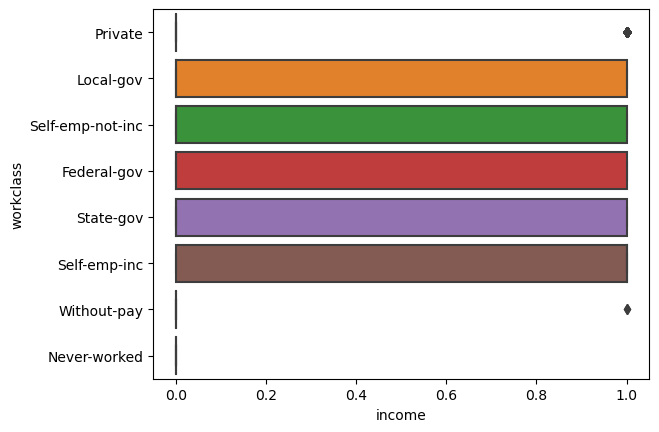

In [13]:
sns.boxplot(data=df,x="income",y="workclass")

In [14]:
df[(df['income']==1) & (df['workclass']=='Without-pay')]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
8903,64,Without-pay,209291,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,60,United-States,1
10647,50,Without-pay,123004,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Own-child,White,Female,0,1887,40,United-States,1


In [15]:
df[(df['income']==1) & (df['workclass']=='Private')]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,1
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,1
15,43,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48817,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,1
48819,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,1
48820,71,Private,287372,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,10,United-States,1
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1


In [16]:
df.drop(8903,inplace=True)
df.drop(10647,inplace=True)

In [17]:
#Visualization

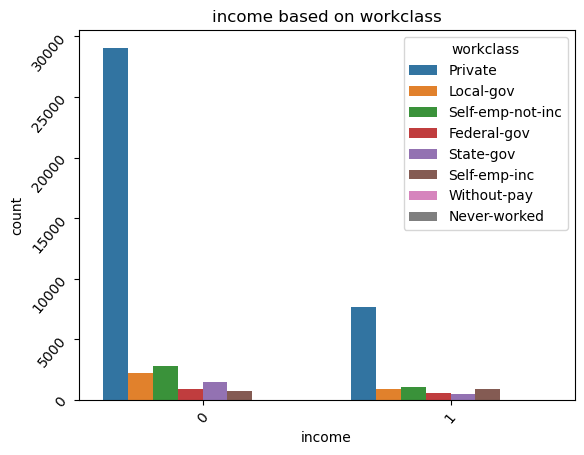

In [18]:
sns.countplot(data=df,x="income",hue="workclass")
plt.title("income based on workclass")
plt.tick_params(rotation=50)
#in both the categories people working in private sector earns highest

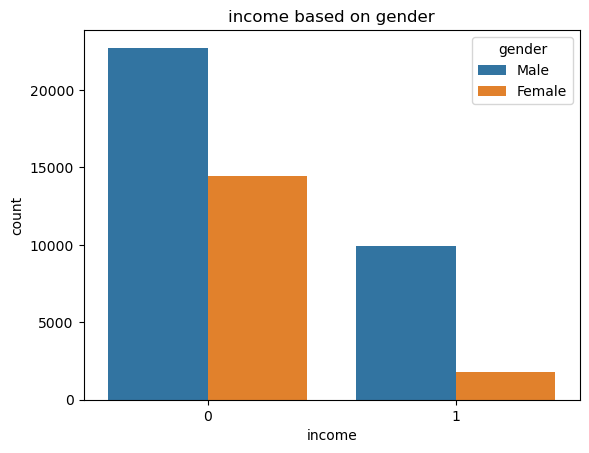

In [19]:
sns.countplot(data=df,x="income",hue="gender")
plt.title("income based on gender")
plt.show()
#in both the categories male earns more than female.

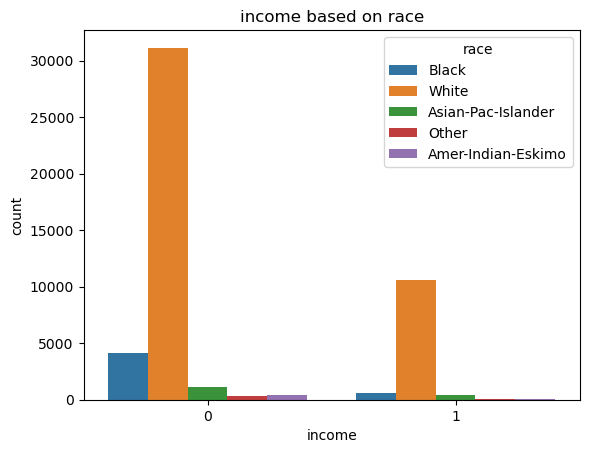

In [20]:
sns.countplot(data=df,x="income",hue="race")
plt.title("income based on race")
plt.show()
#in both the categories people of white race earns.

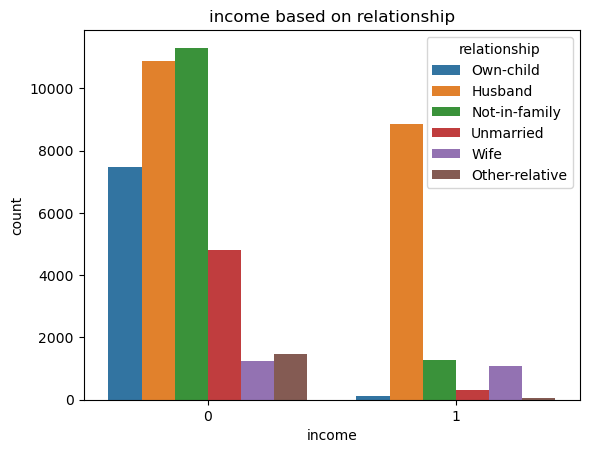

In [21]:
sns.countplot(data=df,x="income",hue="relationship")
plt.title("income based on relationship")
plt.show()
#in category 0(i.e <50K) people who are not in a family earns highest followed by husband
#in category 1(i.e. >=50K) Husband earns more than any other category

<Axes: xlabel='age', ylabel='income'>

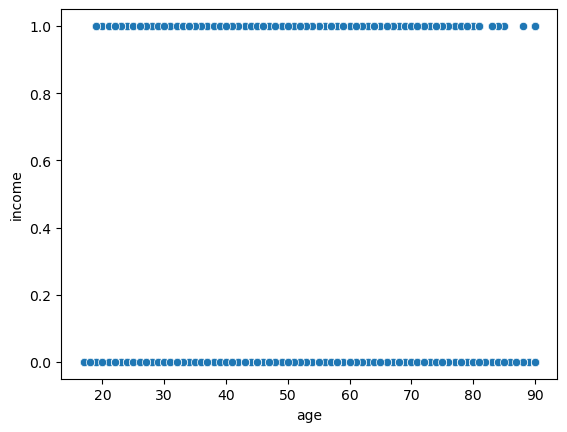

In [22]:
sns.scatterplot(data=df,x='age',y='income')
#both income values have many w.r.t to age

<Axes: xlabel='educational-num', ylabel='income'>

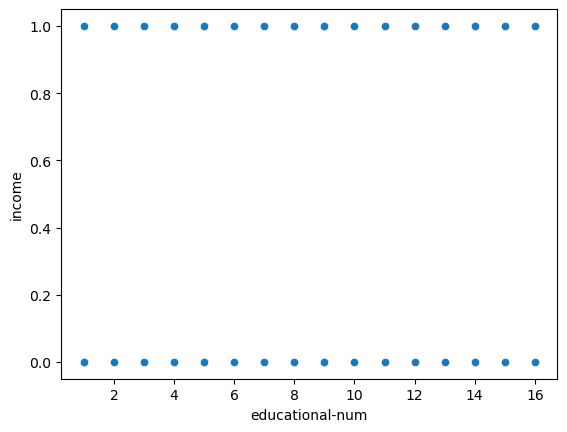

In [23]:
sns.scatterplot(data=df,x='educational-num',y='income')
# both categories have equal number of people w.r.t educational-num

In [24]:
#splitting data in categorical and numeric
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["int64","float64"])
df_num.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1
3,44,160323,10,7688,0,40,1
4,18,103497,10,0,0,30,0


age
0.5576454205807301
-------------------------------------------------------------------------


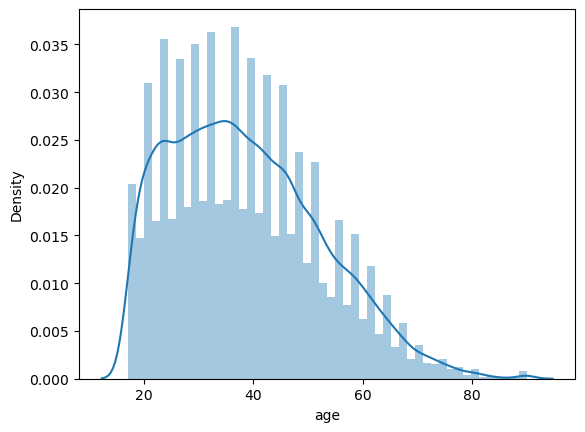

fnlwgt
1.4388150233082524
-------------------------------------------------------------------------


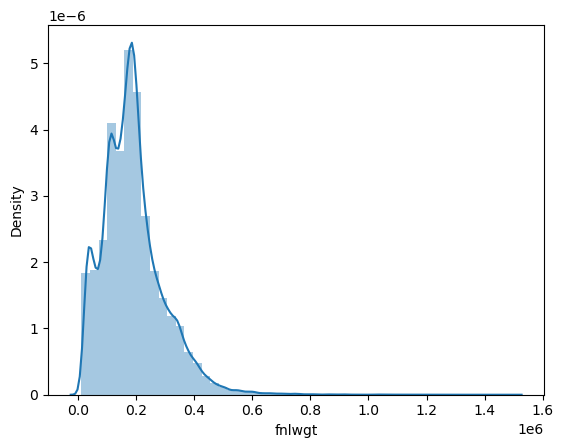

educational-num
-0.31656056906654906
-------------------------------------------------------------------------


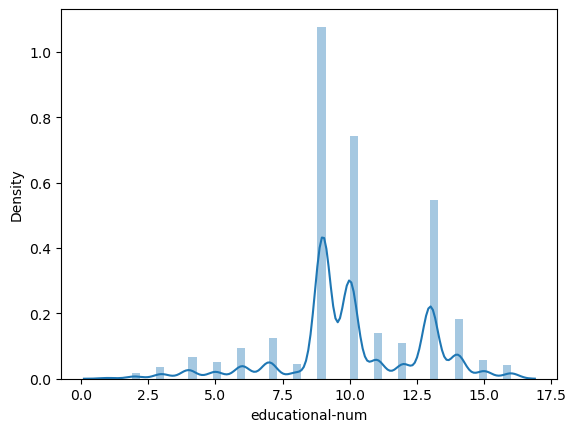

capital-gain
11.894047819606582
-------------------------------------------------------------------------


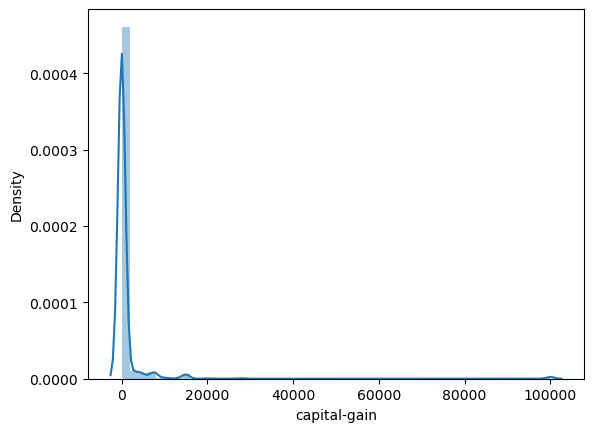

capital-loss
4.570818462993962
-------------------------------------------------------------------------


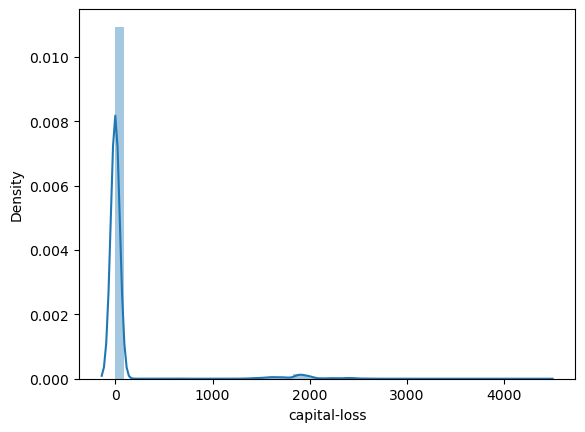

hours-per-week
0.23876995188632824
-------------------------------------------------------------------------


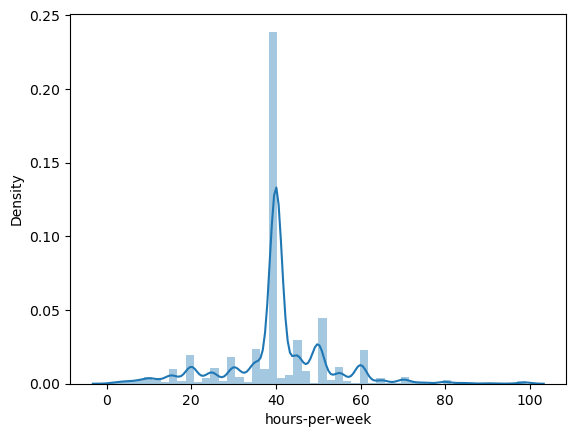

income
1.2223792068608417
-------------------------------------------------------------------------


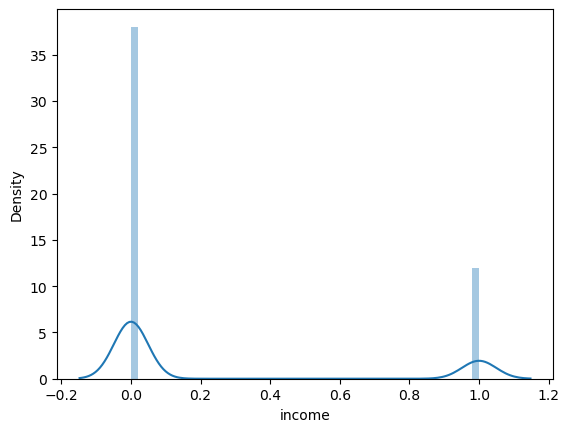

In [25]:
for i in df_num:
    print(i)
    print(skew(df_num[i]))
    sns.distplot(df_num[i])
    print("-------------------------------------------------------------------------")
    plt.show()
#age,fnlwgt,capital-gain,capital-loss

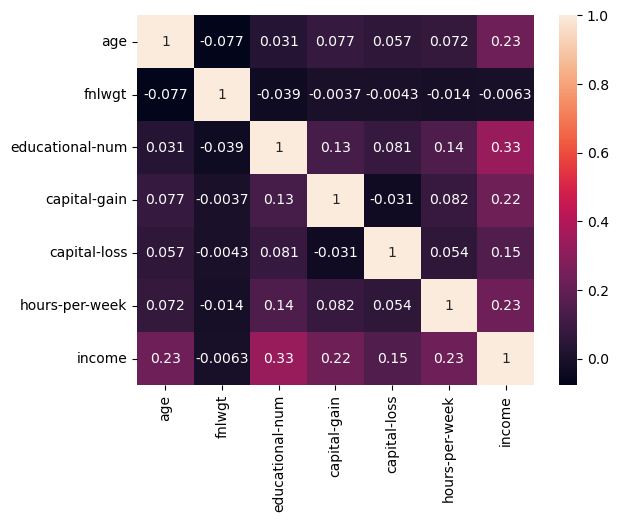

In [26]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [27]:
# df_num['age']=np.sqrt(df_num['age'])

0.5576454205807301
-------------------------------------------------------------------------


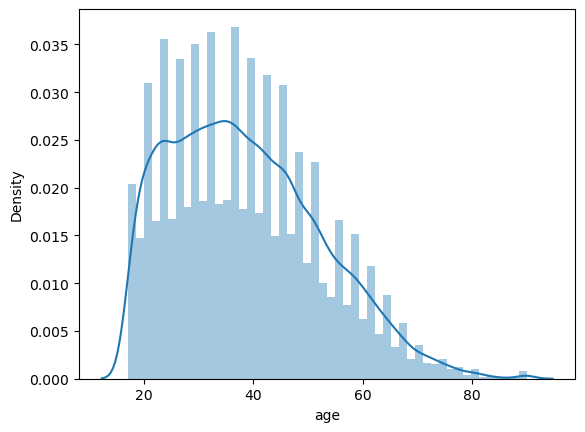

In [28]:
print(skew(df_num['age']))
sns.distplot(df_num['age'])
print("-------------------------------------------------------------------------")
plt.show()

0.1922841240022194
-------------------------------------------------------------------------


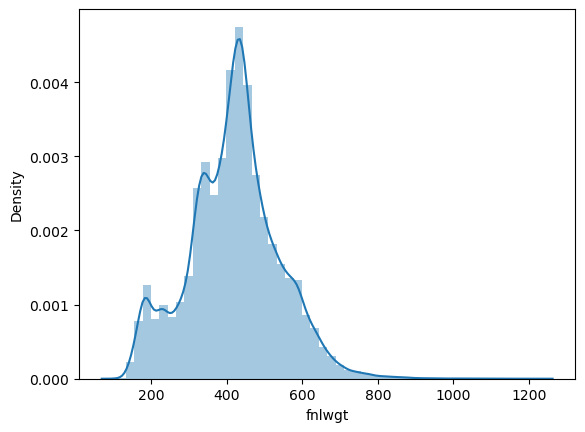

In [29]:
df_num['fnlwgt']=np.sqrt(df_num['fnlwgt'])
print(skew(df_num['fnlwgt']))
sns.distplot(df_num['fnlwgt'])
print("-------------------------------------------------------------------------")
plt.show()

4.570818462993962


<Axes: xlabel='capital-loss', ylabel='Density'>

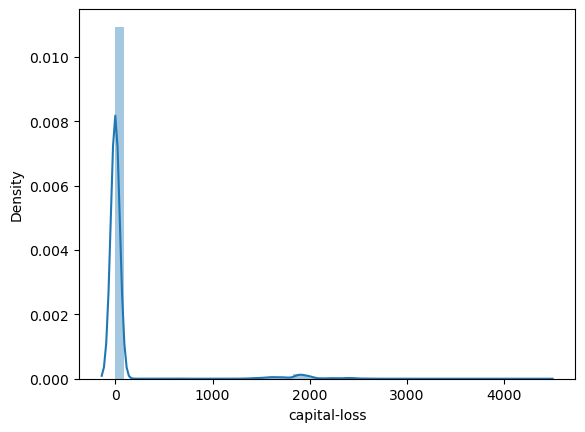

In [30]:
print(skew(df_num['capital-loss']))
sns.distplot(df_num['capital-loss'])

4.2965862209438095


<Axes: xlabel='capital-loss', ylabel='Density'>

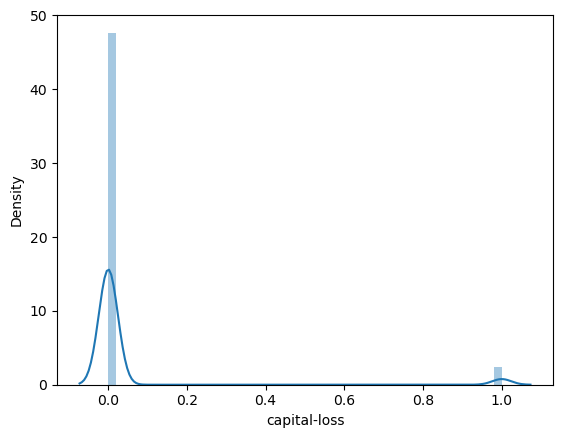

In [31]:
df_num['capital-loss']=normalize(df_num[['capital-loss']])
print(skew(df_num['capital-loss']))
sns.distplot(df_num['capital-loss'])
# print("-------------------------------------------------------------------------")
# plt.show()

In [32]:
np.min(df_num['capital-loss'])

0.0

11.894047819606582


<Axes: xlabel='capital-gain', ylabel='Density'>

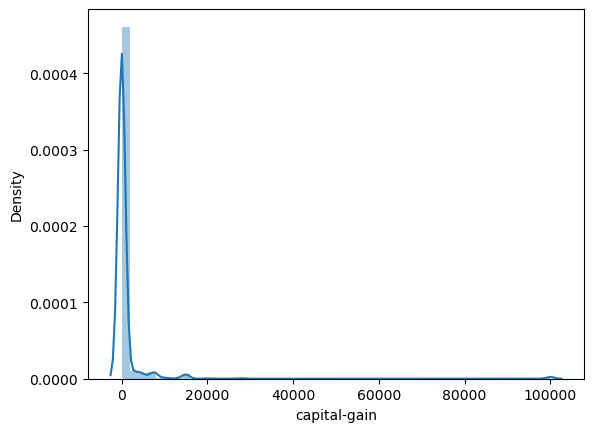

In [33]:
print(skew(df_num['capital-gain']))
sns.distplot(df_num['capital-gain'])

In [34]:
np.max(df_num['capital-gain'])

99999

In [35]:
#Will ignore capital gain and capital loss as skewness is not getting reduced(tried multiple ways but program was getting stuck)

In [36]:
# df_num['capital-gain']=np.log(df_num['capital-gain']+1)
# print(skew(df_num['capital-gain']))

In [37]:
# i=0
# while skew(df_num['capital-gain']) >0.55:
#     i=i+1
#     df_num['capital-gain']=np.log(df_num['capital-gain']+1)
#     # print(i,":",skew(df_num['capital-gain']))
# print(i)
# print(skew(df_num['capital-gain']))
# sns.distplot(df_num['capital-gain'])
# print("-------------------------------------------------------------------------") 
# plt.show()

In [38]:
#using label encoder to transform categorical data
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])
df_cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,3,1,4,6,3,2,1,38
1,3,11,2,4,0,4,1,38
2,1,7,2,10,0,4,1,38
3,3,15,2,6,0,2,1,38
4,3,15,4,9,3,4,0,38


In [39]:
df_new=pd.concat([df_num,df_cat],axis=1)
df_new

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,25,476.237336,7,0,0.0,40,0,3,1,4,6,3,2,1,38
1,38,299.689840,9,0,0.0,50,0,3,11,2,4,0,4,1,38
2,28,580.474806,12,0,0.0,40,1,1,7,2,10,0,4,1,38
3,44,400.403546,10,7688,0.0,40,1,3,15,2,6,0,2,1,38
4,18,321.709496,10,0,0.0,30,0,3,15,4,9,3,4,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,507.249446,12,0,0.0,38,0,3,7,2,12,5,4,0,38
48838,40,392.904569,9,0,0.0,40,1,3,11,2,6,0,4,1,38
48839,58,389.756334,9,0,0.0,40,0,3,11,6,0,4,4,0,38
48840,22,448.876375,9,0,0.0,20,0,3,11,4,0,3,4,1,38


<Axes: xlabel='income'>

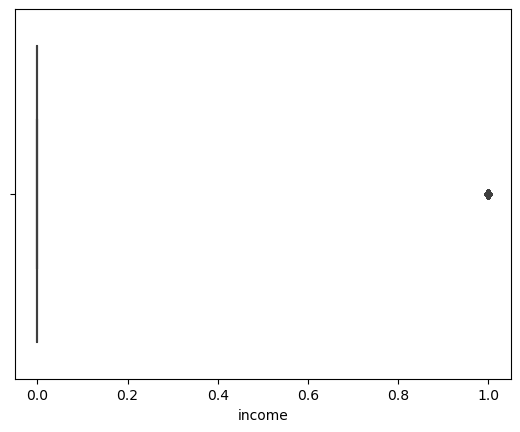

In [40]:
sns.boxplot(data=df_new,x="income")

In [41]:
# sns.boxplot(data=df_new,x="income",y="")

In [42]:
df_mm=df_new.copy()
df_ss=df_new.copy()

In [43]:
for col in df_ss:
    ss=StandardScaler()
    if col!='income':
        df_ss[col]=ss.fit_transform(df_ss[[col]])
df_ss

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,-0.995096,0.480364,-1.197256,-0.144807,-0.22134,-0.034055,0,-0.089604,-2.397295,0.916106,-0.038511,0.971649,-1.971695,0.704210,0.259699
1,-0.046888,-0.994224,-0.419345,-0.144807,-0.22134,0.772965,0,-0.089604,0.183663,-0.410407,-0.542432,-0.900848,0.392393,0.704210,0.259699
2,-0.776278,1.350992,0.747520,-0.144807,-0.22134,-0.034055,1,-1.890529,-0.848720,-0.410407,0.969331,-0.900848,0.392393,0.704210,0.259699
3,0.390747,-0.153027,-0.030390,0.886850,-0.22134,-0.034055,1,-0.089604,1.216047,-0.410407,-0.038511,-0.900848,-1.971695,0.704210,0.259699
4,-1.505669,-0.810308,-0.030390,-0.144807,-0.22134,-0.841076,0,-0.089604,1.216047,0.916106,0.717371,0.971649,0.392393,-1.420032,0.259699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849217,0.739388,0.747520,-0.144807,-0.22134,-0.195460,0,-0.089604,-0.848720,-0.410407,1.473252,2.219980,0.392393,-1.420032,0.259699
48838,0.098990,-0.215661,-0.419345,-0.144807,-0.22134,-0.034055,1,-0.089604,0.183663,-0.410407,-0.038511,-0.900848,0.392393,0.704210,0.259699
48839,1.411894,-0.241956,-0.419345,-0.144807,-0.22134,-0.034055,0,-0.089604,0.183663,2.242618,-1.550275,1.595814,0.392393,-1.420032,0.259699
48840,-1.213913,0.251835,-0.419345,-0.144807,-0.22134,-1.648097,0,-0.089604,0.183663,0.916106,-1.550275,0.971649,0.392393,0.704210,0.259699


In [44]:
for col in df_mm:
    mm=MinMaxScaler()
    if col!='income':
        df_mm[col]=mm.fit_transform(df_mm[[col]])
df_mm

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,0.109589,0.329194,0.400000,0.000000,0.0,0.397959,0,0.428571,0.066667,0.666667,0.461538,0.6,0.5,1.0,0.95
1,0.287671,0.170140,0.533333,0.000000,0.0,0.500000,0,0.428571,0.733333,0.333333,0.307692,0.0,1.0,1.0,0.95
2,0.150685,0.423103,0.733333,0.000000,0.0,0.397959,1,0.142857,0.466667,0.333333,0.769231,0.0,1.0,1.0,0.95
3,0.369863,0.260874,0.600000,0.076881,0.0,0.397959,1,0.428571,1.000000,0.333333,0.461538,0.0,0.5,1.0,0.95
4,0.013699,0.189978,0.600000,0.000000,0.0,0.295918,0,0.428571,1.000000,0.666667,0.692308,0.6,1.0,0.0,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.357134,0.733333,0.000000,0.0,0.377551,0,0.428571,0.466667,0.333333,0.923077,1.0,1.0,0.0,0.95
48838,0.315068,0.254118,0.533333,0.000000,0.0,0.397959,1,0.428571,0.733333,0.333333,0.461538,0.0,1.0,1.0,0.95
48839,0.561644,0.251282,0.533333,0.000000,0.0,0.397959,0,0.428571,0.733333,1.000000,0.000000,0.8,1.0,0.0,0.95
48840,0.068493,0.304544,0.533333,0.000000,0.0,0.193878,0,0.428571,0.733333,0.666667,0.000000,0.6,1.0,1.0,0.95


In [45]:
# sns.boxplot(data=df_ss,x="income",y="workclass")

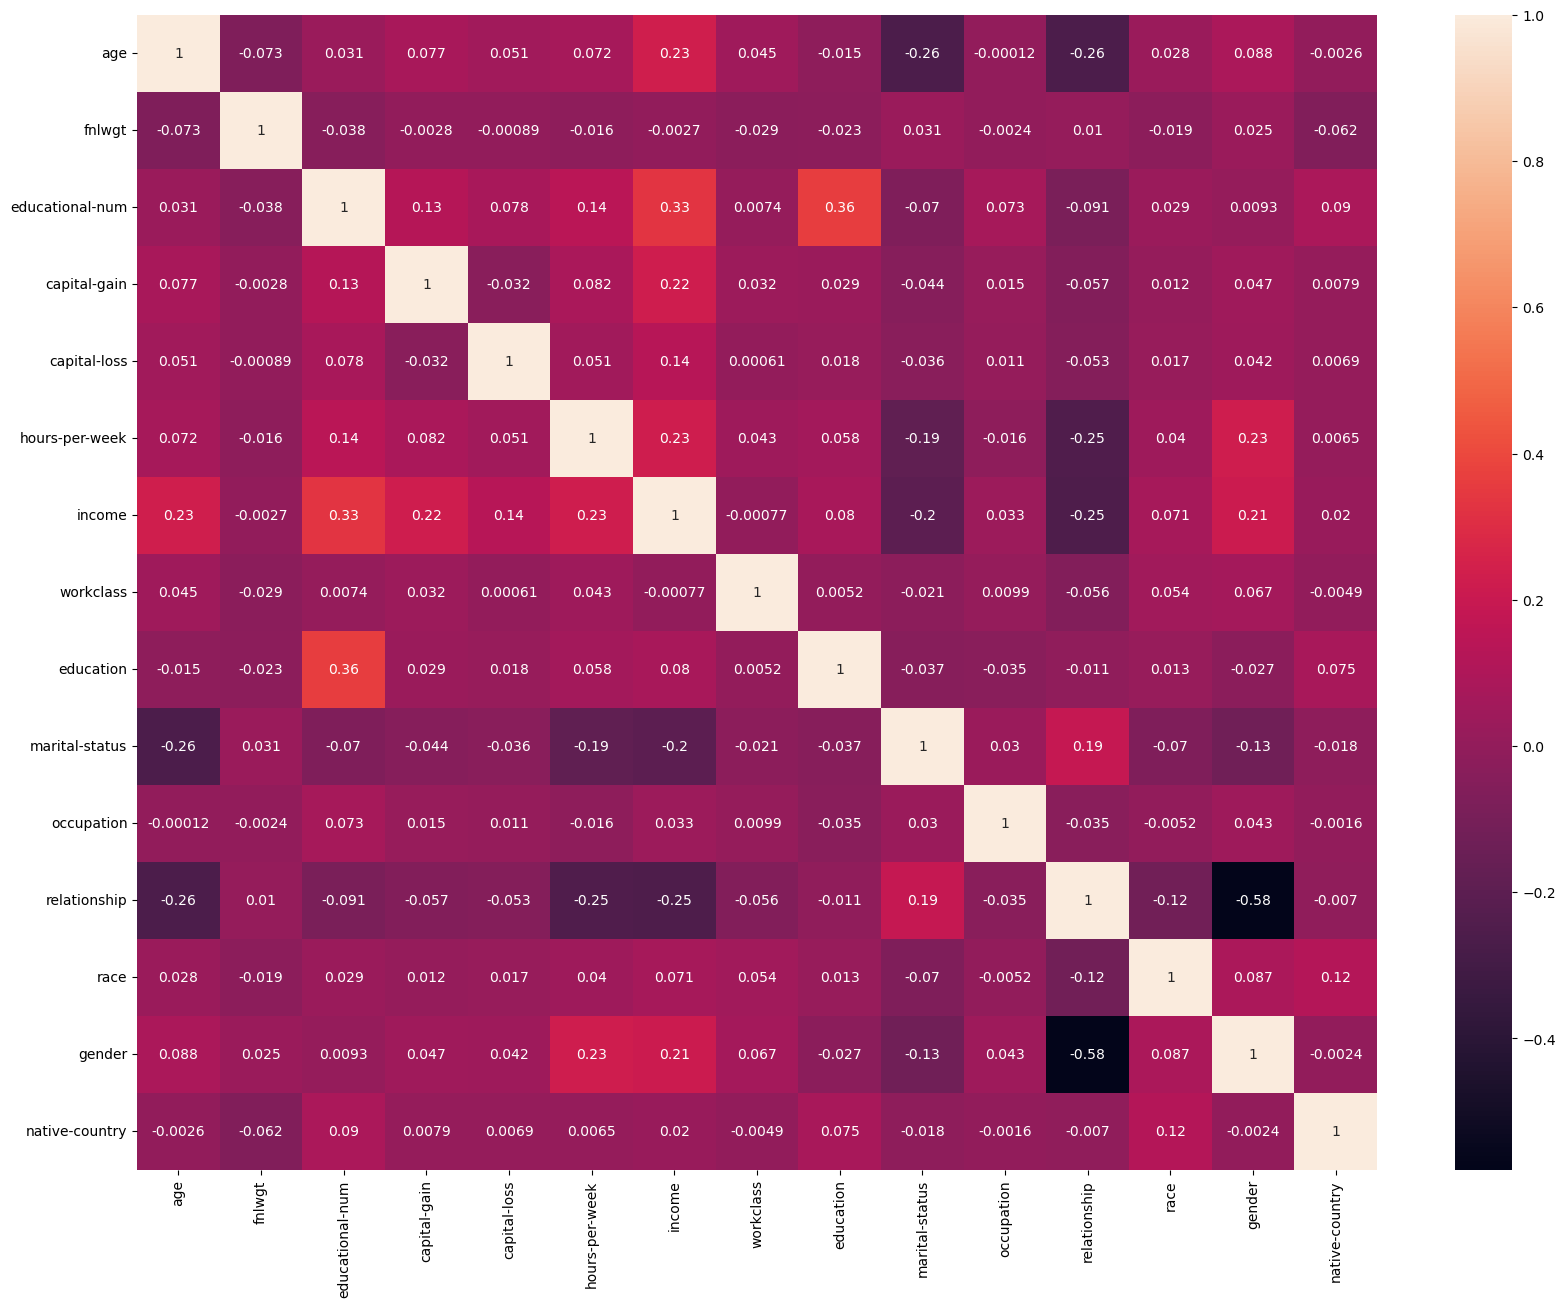

In [46]:
#heatmap doesnot shows any multi collinearity
plt.figure(figsize=(20,15))
sns.heatmap(df_ss.corr(),annot=True)
plt.show()

<Axes: xlabel='income', ylabel='workclass'>

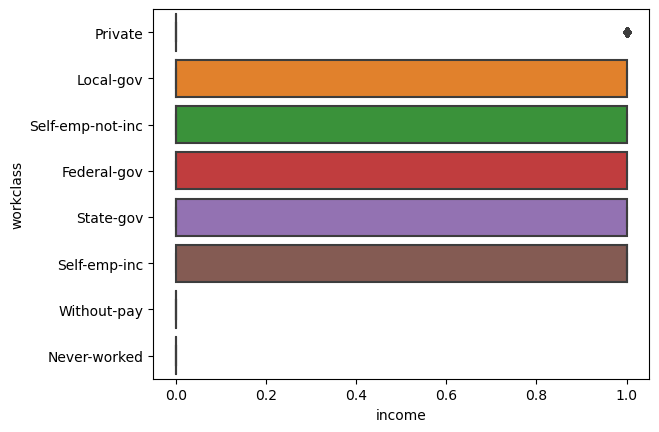

In [47]:
sns.boxplot(data=df,x="income",y="workclass")

In [48]:
df_ss['income'].value_counts()

0    37155
1    11685
Name: income, dtype: int64

In [49]:
df_ss

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,-0.995096,0.480364,-1.197256,-0.144807,-0.22134,-0.034055,0,-0.089604,-2.397295,0.916106,-0.038511,0.971649,-1.971695,0.704210,0.259699
1,-0.046888,-0.994224,-0.419345,-0.144807,-0.22134,0.772965,0,-0.089604,0.183663,-0.410407,-0.542432,-0.900848,0.392393,0.704210,0.259699
2,-0.776278,1.350992,0.747520,-0.144807,-0.22134,-0.034055,1,-1.890529,-0.848720,-0.410407,0.969331,-0.900848,0.392393,0.704210,0.259699
3,0.390747,-0.153027,-0.030390,0.886850,-0.22134,-0.034055,1,-0.089604,1.216047,-0.410407,-0.038511,-0.900848,-1.971695,0.704210,0.259699
4,-1.505669,-0.810308,-0.030390,-0.144807,-0.22134,-0.841076,0,-0.089604,1.216047,0.916106,0.717371,0.971649,0.392393,-1.420032,0.259699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849217,0.739388,0.747520,-0.144807,-0.22134,-0.195460,0,-0.089604,-0.848720,-0.410407,1.473252,2.219980,0.392393,-1.420032,0.259699
48838,0.098990,-0.215661,-0.419345,-0.144807,-0.22134,-0.034055,1,-0.089604,0.183663,-0.410407,-0.038511,-0.900848,0.392393,0.704210,0.259699
48839,1.411894,-0.241956,-0.419345,-0.144807,-0.22134,-0.034055,0,-0.089604,0.183663,2.242618,-1.550275,1.595814,0.392393,-1.420032,0.259699
48840,-1.213913,0.251835,-0.419345,-0.144807,-0.22134,-1.648097,0,-0.089604,0.183663,0.916106,-1.550275,0.971649,0.392393,0.704210,0.259699


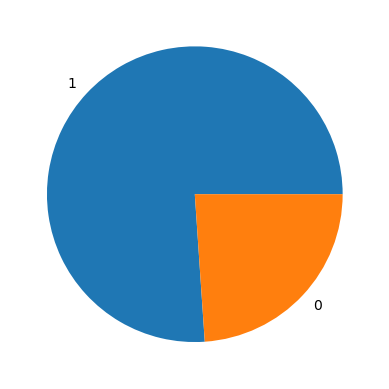

In [50]:
plt.pie(df_ss['income'].value_counts(),labels=['1','0'])
plt.show()

In [51]:
df_ss['income'].value_counts()

0    37155
1    11685
Name: income, dtype: int64

<Axes: xlabel='income', ylabel='count'>

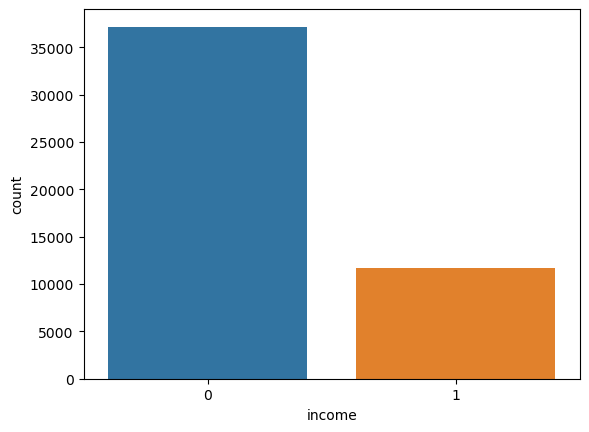

In [52]:
sns.countplot(data=df_ss,x='income')

In [53]:
#data is imablenced thus will use over sampling to use algorithms

## Logistic Regression

In [54]:
os=RandomOverSampler()
x=df_mm[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_mm['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(y_train.value_counts())
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
y_hat=lr.predict(x_test)
print("Coef:",lr.coef_)
print("Intercept:",lr.intercept_)
print("Bias:",lr.score(x_train,y_train))
print("Variance:",lr.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))

0    26045
1     8143
Name: income, dtype: int64
Coef: [[ 3.32933331  0.54554809  5.25356007  3.50838948 -0.4961142   0.24629058
  -1.59674156 -0.1260335  -0.32796967  0.52308123  0.90912064  0.06547807]]
Intercept: [-6.49691078]
Bias: 0.735053235053235
Variance: 0.737032487032487
Accuracy: 0.737032487032487
Recall_Score: 0.769621682665161
Precision_Score 0.47301752559430854
roc_auc: 0.7481321734657939


In [55]:
confusion_matrix(y_test,y_hat)

array([[8073, 3037],
       [ 816, 2726]])

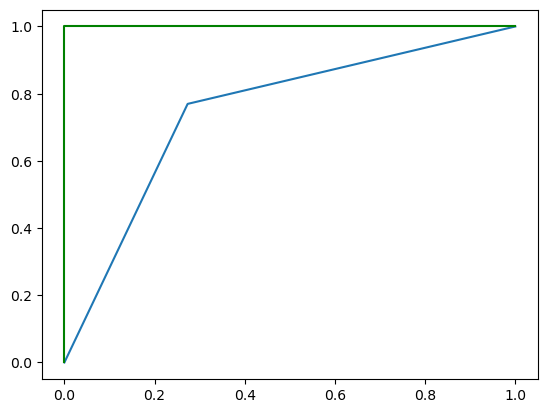

In [56]:
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

In [57]:
os=RandomOverSampler()
x=df_new[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_new['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(y_train.value_counts())
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
y_hat=lr.predict(x_test)
print("Coef:",lr.coef_)
print("Intercept:",lr.intercept_)
print("Bias:",lr.score(x_train,y_train))
print("Variance:",lr.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))

0    25979
1     8209
Name: income, dtype: int64
Coef: [[ 0.02604188 -0.0010952   0.29537063  0.02386056 -0.21716558 -0.03452472
  -0.37555362 -0.0111689  -0.24406851 -0.13085291  0.20581648 -0.05190812]]
Intercept: [-0.20262649]
Bias: 0.7070609570609571
Variance: 0.7028392028392029
Accuracy: 0.7028392028392029
Recall_Score: 0.7451093210586881
Precision_Score 0.42753383955100693
roc_auc: 0.7174007593124507


In [58]:
confusion_matrix(y_test,y_hat)

array([[7708, 3468],
       [ 886, 2590]])

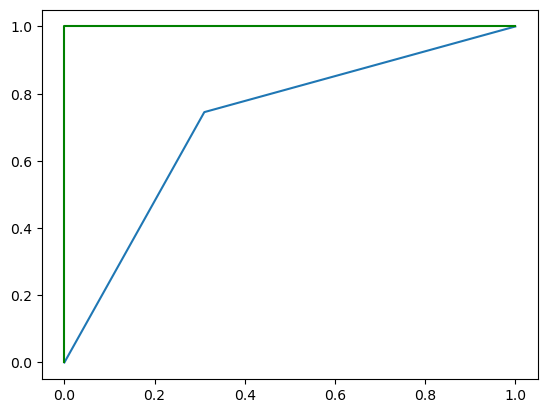

In [59]:
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

In [60]:
os=RandomOverSampler()
x=df_ss[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_ss['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(y_train.value_counts())
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
y_hat=lr.predict(x_test)
print("Coef:",lr.coef_)
print("Intercept:",lr.intercept_)
print("Bias:",lr.score(x_train,y_train))
print("Variance:",lr.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))

0    26000
1     8188
Name: income, dtype: int64
Coef: [[ 0.60635009  0.06938707  0.92308165  0.433194   -0.0982319   0.0589545
  -0.40654096 -0.02691914 -0.12362764  0.1134782   0.41338984 -0.00344198]]
Intercept: [-0.52563104]
Bias: 0.7365449865449866
Variance: 0.7341659841659842
Accuracy: 0.7341659841659842
Recall_Score: 0.7663711752931084
Precision_Score 0.4654393886766238
roc_auc: 0.7452205495470472


In [61]:
confusion_matrix(y_test,y_hat)

array([[8077, 3078],
       [ 817, 2680]])

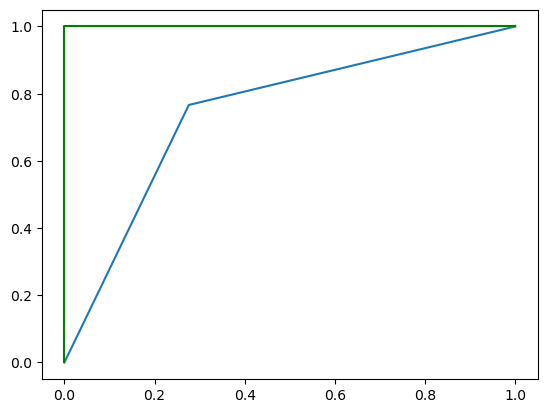

In [62]:
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

In [63]:
x=df_ss[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_ss['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
sgd=SGDClassifier()
sgd.fit(x_train_ns,y_train_ns)
y_hat=sgd.predict(x_test)
print("Coef:",sgd.coef_)
print("Intercept:",sgd.intercept_)
print("Bias:",sgd.score(x_train,y_train))
print("Variance:",sgd.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat
                                        ))
print("roc_auc:",roc_auc_score(y_test,y_hat))

Coef: [[ 0.53068371  0.16036261  0.86507081  0.48598389 -0.13144339  0.086647
  -0.25730723 -0.07312721 -0.052742    0.073062    0.38093733 -0.06215381]]
Intercept: [-0.47805737]
Bias: 0.7428044928044928
Variance: 0.7358722358722358
Accuracy: 0.7358722358722358
Recall_Score: 0.7450759707371976
Precision_Score 0.4718460441910192
roc_auc: 0.7390004110308803


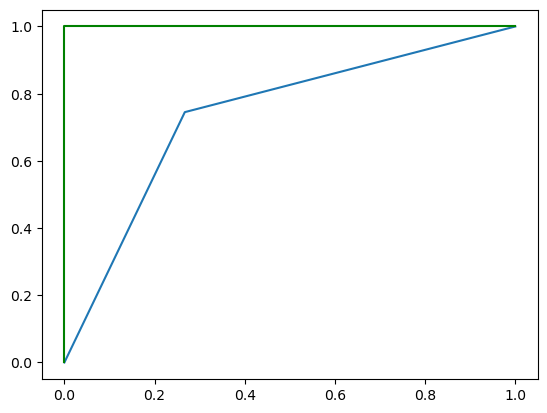

In [64]:
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

## Annova Test

In [65]:
x=df_new[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_new['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
for K in range(12,1,-1):
    annova=SelectKBest(score_func=f_regression,k=K)
    annova.fit(x,y)
    x_train_annova=annova.transform(x_train)
    x_test_annova=annova.transform(x_test)
    lg=LogisticRegression()
    x_train_ns,y_train_ns=os.fit_resample(x_train_annova,y_train)
    lg.fit(x_train_ns,y_train_ns)
    print(K,":",lg.score(x_test_annova,y_test))

12 : 0.7112339612339612
11 : 0.694990444990445
10 : 0.7195604695604696
9 : 0.7328692328692329
8 : 0.7355309855309855
7 : 0.7345072345072345
6 : 0.7348484848484849
5 : 0.7319137319137319
4 : 0.7244062244062244
3 : 0.7072754572754573
2 : 0.7231094731094732


In [66]:
x=df_new[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_new['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
annova=SelectKBest(score_func=f_regression,k=10)
fitted=annova.fit(x,y)
feature_score=pd.DataFrame(fitted.scores_,columns=['score'])
feature_score['colums']=x.columns
x_train_annova=annova.transform(x_train)
x_test_annova=annova.transform(x_test)
lg=LogisticRegression()
x_train_ns,y_train_ns=os.fit_resample(x_train_annova,y_train)
lg.fit(x_train_ns,y_train_ns)
print(feature_score.nlargest(10,'score'))

          score           colums
2   6077.317109  educational-num
8   3346.548355     relationship
0   2735.261355              age
3   2669.367330   hours-per-week
10  2359.421977           gender
6   2014.950387   marital-status
5    315.228909        education
9    246.812967             race
7     51.845223       occupation
11    20.247051   native-country


In [67]:
os=RandomOverSampler()
x=df_new[['age','educational-num','hours-per-week','marital-status','relationship','gender','education','race','occupation','native-country']]
y=df_new['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(y_train.value_counts())
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
y_hat=lr.predict(x_test)
print("Coef:",lr.coef_)
print("Intercept:",lr.intercept_)
print("Bias:",lr.score(x_train,y_train))
print("Variance:",lr.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))

0    25920
1     8268
Name: income, dtype: int64
Coef: [[ 0.04089734  0.33816264  0.02150555 -0.32413503  0.05482295  1.73308738
  -0.01168617 -0.15755581 -0.02544257 -0.02413975]]
Intercept: [-4.96846782]
Bias: 0.7178834678834679
Variance: 0.7162844662844663
Accuracy: 0.7162844662844663
Recall_Score: 0.7679250804799532
Precision_Score 0.43820975283901137
roc_auc: 0.7342518148283167


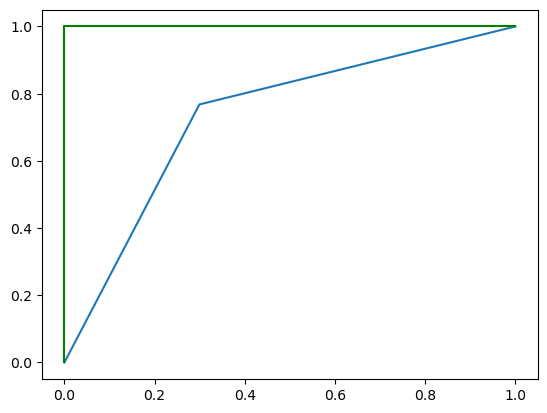

In [68]:
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

In [69]:
x=df_ss[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_ss['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
for K in range(12,1,-1):
    annova=SelectKBest(score_func=f_regression,k=K)
    annova.fit(x,y)
    x_train_annova=annova.transform(x_train)
    x_test_annova=annova.transform(x_test)
    lg=LogisticRegression()
    x_train_ns,y_train_ns=os.fit_resample(x_train_annova,y_train)
    lg.fit(x_train_annova,y_train)
    print(K,":",lg.score(x_test_annova,y_test))

12 : 0.8022795522795523
11 : 0.8021430521430521
10 : 0.8015970515970516
9 : 0.8014605514605515
8 : 0.8014605514605515
7 : 0.8012558012558012
6 : 0.8024843024843025
5 : 0.8014605514605515
4 : 0.799071799071799
3 : 0.7952497952497952
2 : 0.8042588042588042


In [70]:
x=df_ss[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_ss['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
annova=SelectKBest(score_func=f_regression,k=12)
fitted=annova.fit(x,y)
feature_score=pd.DataFrame(fitted.scores_,columns=['score'])
feature_score['colums']=x.columns
x_train_annova=annova.transform(x_train)
x_test_annova=annova.transform(x_test)
lg=LogisticRegression()
x_train_ns,y_train_ns=os.fit_resample(x_train_annova,y_train)
lg.fit(x_train_annova,y_train)
print(feature_score.nlargest(12,'score'))

          score           colums
2   6077.317109  educational-num
8   3346.548355     relationship
0   2735.261355              age
3   2669.367330   hours-per-week
10  2359.421977           gender
6   2014.950387   marital-status
5    315.228909        education
9    246.812967             race
7     51.845223       occupation
11    20.247051   native-country
1      0.366616           fnlwgt
4      0.028763        workclass


In [71]:
os=RandomOverSampler()
x=df_ss[['age','educational-num','hours-per-week','marital-status','relationship','gender','education','race','occupation','native-country','fnlwgt','workclass']]
y=df_ss['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(y_train.value_counts())
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
y_hat=lr.predict(x_test)
print("Coef:",lr.coef_)
print("Intercept:",lr.intercept_)
print("Bias:",lr.score(x_train,y_train))
print("Variance:",lr.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))

0    25948
1     8240
Name: income, dtype: int64
Coef: [[ 0.61576195  0.93347242  0.44650974 -0.40106783 -0.10254049  0.43345662
   0.03001306  0.11300966 -0.02144278  0.01533869  0.05461008 -0.08711347]]
Intercept: [-0.53344327]
Bias: 0.7383292383292384
Variance: 0.7339612339612339
Accuracy: 0.7339612339612339
Recall_Score: 0.7500725689404935
Precision_Score 0.45970467888276106


In [72]:
x=df_mm[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_mm['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
for K in range(12,2,-1):
    annova=SelectKBest(score_func=f_regression,k=K)
    annova.fit(x,y)
    x_train_annova=annova.transform(x_train)
    x_test_annova=annova.transform(x_test)
    lg=LogisticRegression()
    x_train_ns,y_train_ns=os.fit_resample(x_train_annova,y_train)
    lg.fit(x_train_annova,y_train)
    print(K,":",lg.score(x_test_annova,y_test))


12 : 0.8082855582855583
11 : 0.8071935571935572
10 : 0.8063745563745564
9 : 0.8064428064428064
8 : 0.8063063063063063
7 : 0.8061015561015561
6 : 0.8071935571935572
5 : 0.8064428064428064
4 : 0.805009555009555
3 : 0.8027573027573027


In [73]:
x=df_mm[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_mm['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
annova=SelectKBest(score_func=f_regression,k=11)
fitted=annova.fit(x,y)
feature_score=pd.DataFrame(fitted.scores_,columns=['score'])
feature_score['colums']=x.columns
x_train_annova=annova.transform(x_train)
x_test_annova=annova.transform(x_test)
lg=LogisticRegression()
x_train_ns,y_train_ns=os.fit_resample(x_train_annova,y_train)
lg.fit(x_train_annova,y_train)
print(feature_score.nlargest(11,'score'))

          score           colums
2   6077.317109  educational-num
8   3346.548355     relationship
0   2735.261355              age
3   2669.367330   hours-per-week
10  2359.421977           gender
6   2014.950387   marital-status
5    315.228909        education
9    246.812967             race
7     51.845223       occupation
11    20.247051   native-country
1      0.366616           fnlwgt


In [74]:
os=RandomOverSampler()
x=df_ss[['age','fnlwgt','educational-num','hours-per-week','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_ss['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(y_train.value_counts())
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
y_hat=lr.predict(x_test)
print("Coef:",lr.coef_)
print("Intercept:",lr.intercept_)
print("Bias:",lr.score(x_train,y_train))
print("Variance:",lr.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))

0    25953
1     8235
Name: income, dtype: int64
Coef: [[ 0.60520312  0.07426537  0.91030345  0.42193935  0.04680837 -0.39736173
  -0.00584177 -0.10656288  0.08723955  0.42216452  0.01174718]]
Intercept: [-0.50598922]
Bias: 0.7338247338247338
Variance: 0.7376467376467376
Accuracy: 0.7376467376467376
Recall_Score: 0.7721739130434783
Precision_Score 0.4655714785040196


## Wrapper Methods

In [75]:
fwds=SequentialFeatureSelector(LogisticRegression(),k_features=10,forward=True,scoring='roc_auc',cv=3)
x=df_new[['age','fnlwgt','educational-num','capital-loss','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_new['income']
fwds.fit(x,y)

SequentialFeatureSelector(cv=3, estimator=LogisticRegression(),
                          k_features=(10, 10), scoring='roc_auc')

In [76]:
fwds.k_feature_names_

('age',
 'educational-num',
 'capital-loss',
 'hours-per-week',
 'workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender')

In [77]:
x=df_new[list(fwds.k_feature_names_)]
y=df_new['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
y_hat=lr.predict(x_test)
print("Coef:",lr.coef_)
print("Intercept:",lr.intercept_)
print("Bias:",lr.score(x_train,y_train))
print("Variance:",lr.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))

Coef: [[ 0.04146384  0.36140721  1.57088433  0.03395551 -0.07484785 -0.30529246
  -0.01295065 -0.17807853  0.04343184  0.34602153]]
Intercept: [-6.239782]
Bias: 0.7373347373347373
Variance: 0.7437209937209938
Accuracy: 0.7437209937209938
Recall_Score: 0.7532913566113337
Precision_Score 0.47638009049773755
roc_auc: 0.7470077503615908


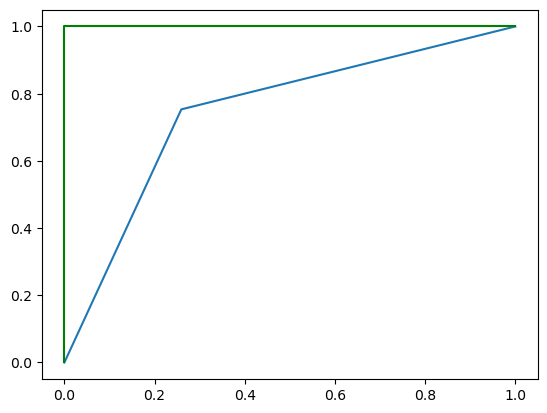

In [78]:
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

In [79]:
bwds=SequentialFeatureSelector(LogisticRegression(),k_features=10,forward=False,scoring='roc_auc',cv=3)
x=df_new[['age','fnlwgt','educational-num','capital-loss','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_new['income']
bwds.fit(x,y)
x=df_new[list(bwds.k_feature_names_)]
y=df_new['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
y_hat=lr.predict(x_test)
print("Coef:",lr.coef_)
print("Intercept:",lr.intercept_)
print("Bias:",lr.score(x_train,y_train))
print("Variance:",lr.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))

Coef: [[ 0.03430486  0.2899096   1.37219383  0.02838822 -0.13556983 -0.3073756
  -0.01360519 -0.20195705  0.13545324  0.30051886]]
Intercept: [-4.99873545]
Bias: 0.7313384813384813
Variance: 0.7306169806169807
Accuracy: 0.7306169806169807
Recall_Score: 0.782051282051282
Precision_Score 0.46313480681626457
roc_auc: 0.7482326056639464


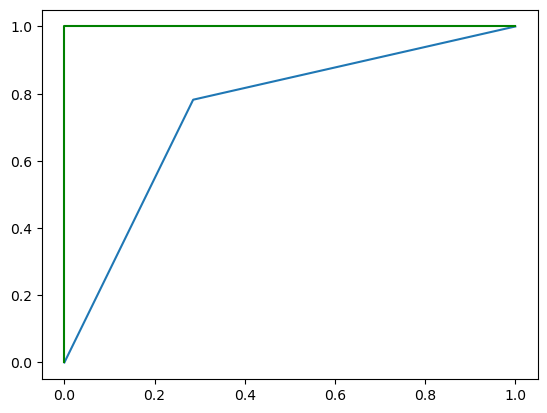

In [80]:
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

In [81]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))
print(accuracy_score(y_test,y_hat))
print(recall_score(y_test,y_hat))
print(precision_score(y_test,y_hat))
print(roc_auc_score(y_test,y_hat))

0.7313384813384813
0.7306169806169807
0.7306169806169807
0.782051282051282
0.46313480681626457
0.7482326056639464


## PCA

In [82]:
x=df_new[['age','fnlwgt','educational-num','capital-loss','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_new['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
for k in range(13,1,-1):
    pca=PCA(n_components=k)
    pca.fit(x)
    x_pca_train=pca.transform(x_train)
    x_pca_test=pca.transform(x_test)
    x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
    lr=LogisticRegression()
    lr.fit(x_train_ns,y_train_ns)
    y_hat=lr.predict(x_test)
    print(k,":",lr.score(x_train,y_train))

13 : 0.6996314496314496
12 : 0.7162454662454663
11 : 0.7004504504504504
10 : 0.7039604539604539
9 : 0.7022932022932022
8 : 0.7024394524394525
7 : 0.7081432081432082
6 : 0.697993447993448
5 : 0.707031707031707
4 : 0.6987831987831988
3 : 0.6985491985491985
2 : 0.7018252018252018


In [83]:
pca=PCA(n_components=7)
x=df_new[['age','fnlwgt','educational-num','capital-loss','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_new['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
pca.fit(x)
 

PCA(n_components=7)

In [84]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))
print(accuracy_score(y_test,y_hat))
print(recall_score(y_test,y_hat))
print(precision_score(y_test,y_hat))
print(roc_auc_score(y_test,y_hat))

0.7018252018252018
0.7018154518154518
0.7018154518154518
0.7742574257425743
0.43389346861128725
0.7265188361059728


## Decision Tree and Random Forest

In [85]:
x=df_new[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_new['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
# x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_hat=dt.predict(x_test)
print("Bias:",dt.score(x_train,y_train))
print("Variance:",dt.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))

Bias: 0.9998537498537499
Variance: 0.7734097734097735
Accuracy: 0.7734097734097735
Recall_Score: 0.5584524810765349
Precision_Score 0.533047899384533
roc_auc: 0.7005162721124668


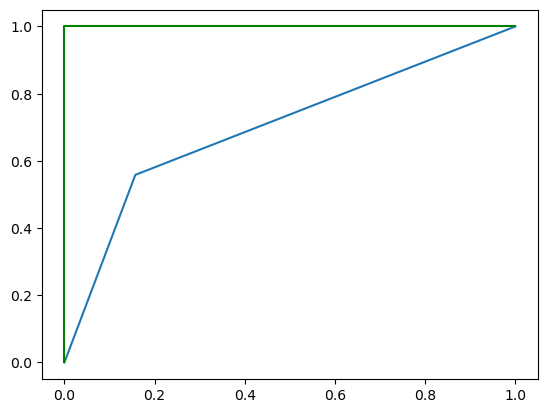

In [86]:
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

In [87]:
x=df_ss[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_ss['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
# x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_hat=dt.predict(x_test) 
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))
print("Bias:",dt.score(x_train,y_train))
print("Variance:",dt.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))

0.9998829998829999
0.7734780234780235
Bias: 0.9998829998829999
Variance: 0.7734780234780235
Accuracy: 0.7734780234780235
Recall_Score: 0.5488253608831022
Precision_Score 0.5292030567685589
roc_auc: 0.6968427550885518


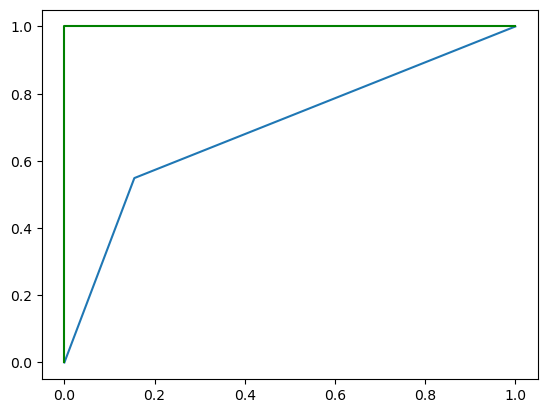

In [88]:
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

0.9999122499122499
0.7753207753207754
Bias: 0.9999122499122499
Variance: 0.7753207753207754
Accuracy: 0.7753207753207754
Recall_Score: 0.5471204188481675
Precision_Score 0.5201880530973452
roc_auc: 0.6962015506047509


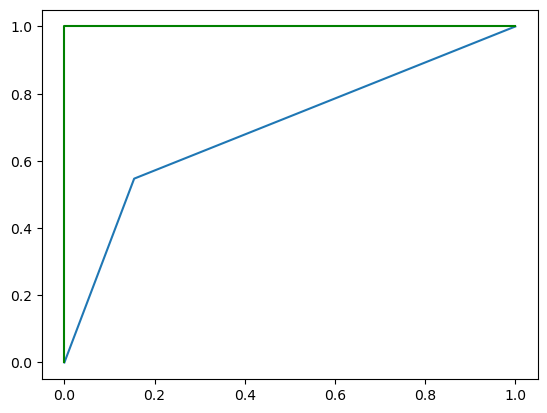

In [89]:
x=df_ss[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_ss['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
# x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_hat=dt.predict(x_test) 
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))
print("Bias:",dt.score(x_train,y_train))
print("Variance:",dt.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

0.9998829998829999
0.7786650286650286
Bias: 0.9998829998829999
Variance: 0.7786650286650286
Accuracy: 0.7786650286650286
Recall_Score: 0.5692090395480226
Precision_Score 0.5397803375301367
roc_auc: 0.7073007040792668


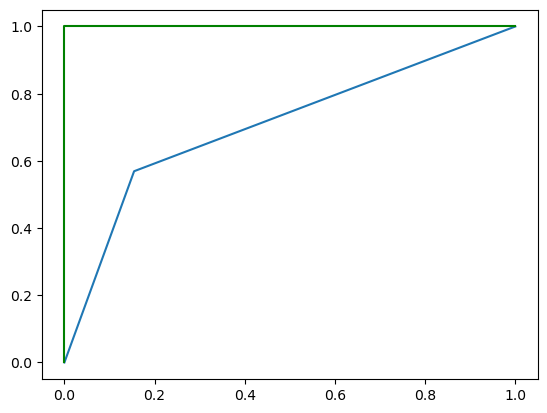

In [90]:
x=df_new[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_new['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
# x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_hat=dt.predict(x_test) 
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))
print("Bias:",dt.score(x_train,y_train))
print("Variance:",dt.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

building tree 1 of 500
building tree 2 of 500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500

building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   16.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.9999414999415


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.831012831012831


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Bias: 0.9999414999415
Variance: 0.831012831012831
Accuracy: 0.831012831012831
Recall_Score: 0.578
Precision_Score 0.6694242223692919
roc_auc: 0.7442098278335724


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished


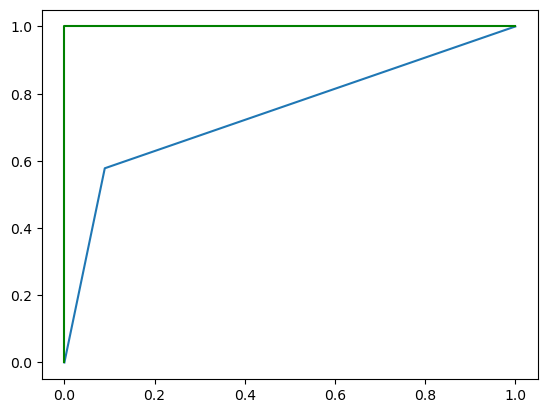

In [91]:
x=df_ss[['age','fnlwgt','educational-num','capital-loss','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_ss['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
# x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
rfc=RandomForestClassifier(n_estimators=500,verbose=2)
rfc.fit(x_train,y_train)
y_hat=rfc.predict(x_test) 
print(rfc.score(x_train,y_train))
print(rfc.score(x_test,y_test))
print("Bias:",rfc.score(x_train,y_train))
print("Variance:",rfc.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

## KMeans

In [92]:
bcss=[]
x=df_new[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_new['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
# rfc=RandomForestClassifier(n_estimators=500,verbose=2)
# rfc.fit(x_train,y_train)
# y_hat=rfc.predict(x_test) 
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(x_train_ns,y_train_ns)
    bcss.append(km.inertia_)

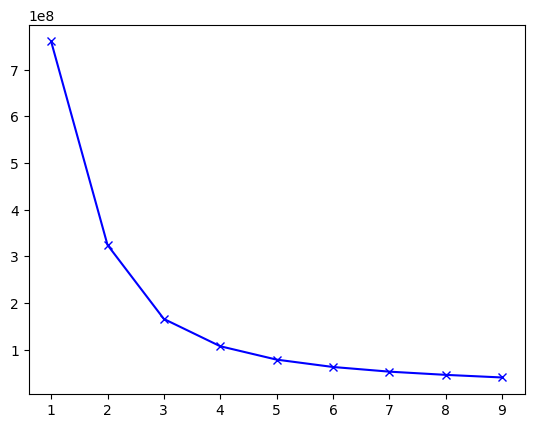

In [93]:
plt.plot(range(1,10),bcss,'bx-')

BCCS= 104566789.94230416
[[ 36.65560216 599.80853092   9.94188137  40.34979029   3.06075494
   10.19796285   2.67849011   6.15733972   1.43367286   3.60467346
    0.70113841  36.01102457]
 [ 38.38852097 453.03390415  10.06171204  40.31120922   3.07245524
   10.27927398   2.63267108   6.16006868   1.46107432   3.71194506
    0.66387049  36.24419917]
 [ 39.04156439 216.09114594  10.17165767  41.13876616   3.15496645
   10.47471772   2.56439208   6.17673049   1.36982491   3.64572083
    0.67108493  37.09867452]
 [ 40.02371598 349.27473528  10.14243875  40.31345096   3.13779556
   10.27423387   2.58668476   6.12922352   1.45517537   3.65161797
    0.65461819  36.6709765 ]]
Bias: -72710374.52656473
Variance: -31856415.415739473
Accuracy: 0.6517881517881517
Recall_Score: 0.20638057594579334
Precision_Score 0.24189278623428193
roc_auc: 0.5000849774418435


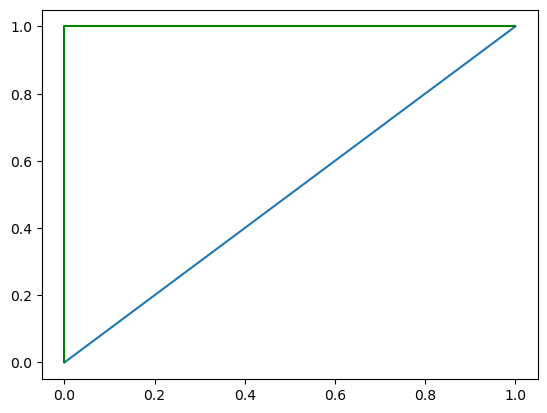

In [94]:
km=KMeans(n_clusters=4)
km.fit(x,y)
print("BCCS=",km.inertia_)
print(km.cluster_centers_)
print("Bias:",km.score(x_train,y_train))
print("Variance:",km.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

In [95]:
bcss=[]
x=df_ss[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_ss['income']
for k in range(1,25):
    km=KMeans(n_clusters=k)
    km.fit(df_ss)
    bcss.append(km.inertia_)

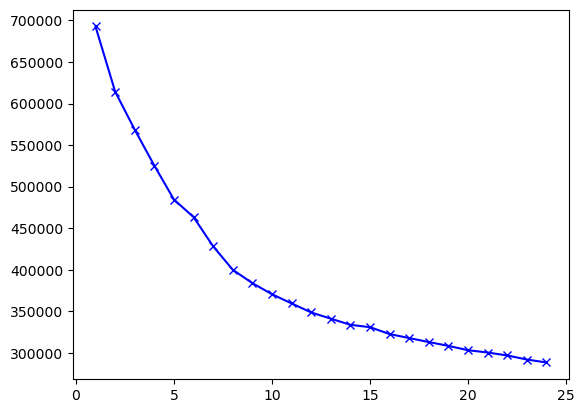

In [96]:
plt.plot(range(1,25),bcss,'bx-')

BCCS= 328153.68674672314
[[ 5.06696889e-01 -2.17416547e-01  4.93794362e-01  4.61242122e-01
   1.95189738e+00  2.38399224e-01 -3.11627507e-01 -2.71016395e-02
  -6.32810472e-01  3.22511337e-01  5.28391805e-01  2.27791974e-01]
 [-3.02924562e-02  1.05302613e-01 -1.70896803e+00 -3.41584691e-01
   1.67008363e-02 -2.04628103e+00  1.79881599e-01  6.68868134e-02
   4.25861750e-02  1.38141351e-01  1.26564922e-01 -3.21969734e-02]
 [-3.74299103e-01  8.49330471e-02 -9.51255158e-02 -3.19779151e-01
  -1.85116858e-01  9.43294760e-02  8.33256604e-01 -4.23793775e-02
   1.06224617e+00 -2.37258407e+00 -9.71613887e-01  8.02534335e-02]
 [-4.30368775e-01 -4.08521610e-02  2.06465290e-01 -4.22431835e-01
  -1.44164142e-01  3.74419164e-01  1.11545380e+00 -3.89542719e-02
   4.54653760e-01  3.81999525e-01 -1.41969231e+00  2.11193842e-01]
 [ 4.10142221e-01 -5.66148212e-02  5.33965568e-01  3.53041134e-01
  -3.18627494e-01  2.22605480e-01 -3.98705040e-01  1.06961756e+00
  -7.72667589e-01  3.87554910e-01  6.95514676e-

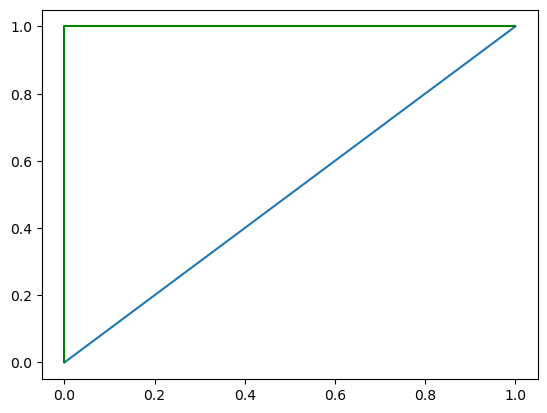

In [97]:
km=KMeans(n_clusters=10)
km.fit(x,y)
print("BCCS=",km.inertia_)
print(km.cluster_centers_)
print("Bias:",km.score(x_train,y_train))
print("Variance:",km.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

## KNN

In [98]:
x=df_new[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_new['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_ns,y_train_ns)
    print(k,":",knn.score(x_test,y_test))

1 : 0.7336199836199836
2 : 0.7360087360087361
3 : 0.6921239421239421
4 : 0.7093229593229593
5 : 0.6756074256074256
6 : 0.7003139503139503
7 : 0.6710346710346711
8 : 0.6965601965601965
9 : 0.6717854217854218
10 : 0.6928064428064428
11 : 0.6711029211029211
12 : 0.694990444990445
13 : 0.672945672945673
14 : 0.6885066885066885
15 : 0.6688506688506689
16 : 0.6831149331149331
17 : 0.6685094185094185
18 : 0.6834561834561834
19 : 0.6717854217854218
20 : 0.6826371826371826


0.7360087360087361
Bias: 0.985053235053235
Variance: 0.7360087360087361
Accuracy: 0.6519929019929019
Recall_Score: 0.20471993176002273
Precision_Score 0.23825281270681667
roc_auc: 0.49899220656254395


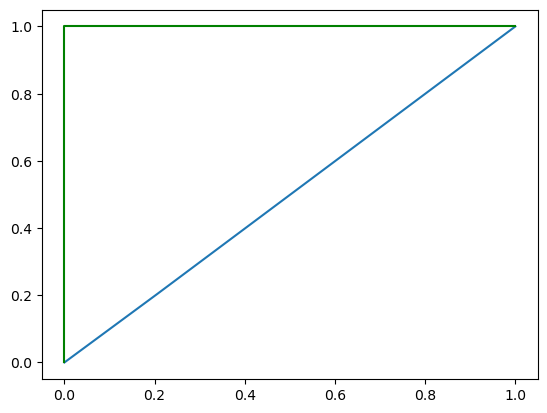

In [99]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_ns,y_train_ns)
print(knn.score(x_test,y_test))
print("Bias:",knn.score(x_train,y_train))
print("Variance:",knn.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

In [100]:
x=df_ss[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_ss['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_ns,y_train_ns)
    print(k,":",knn.score(x_test,y_test))

1 : 0.777982527982528
2 : 0.7788015288015288
3 : 0.7633770133770134
4 : 0.7742970242970243
5 : 0.7567567567567568
6 : 0.7763445263445263
7 : 0.762080262080262
8 : 0.7783920283920284
9 : 0.7655610155610155
10 : 0.7812585312585313
11 : 0.7687005187005187
12 : 0.7792792792792793
13 : 0.7714305214305214
14 : 0.7813267813267813
15 : 0.7726590226590226
16 : 0.7792110292110292
17 : 0.7693147693147693
18 : 0.7768222768222768
19 : 0.7692465192465192
20 : 0.7771635271635272


0.7788015288015288
Bias: 0.9881537381537382
Variance: 0.7788015288015288
Accuracy: 0.6515151515151515
Recall_Score: 0.206809229037704
Precision_Score 0.24321641297154203
roc_auc: 0.5003680313507136


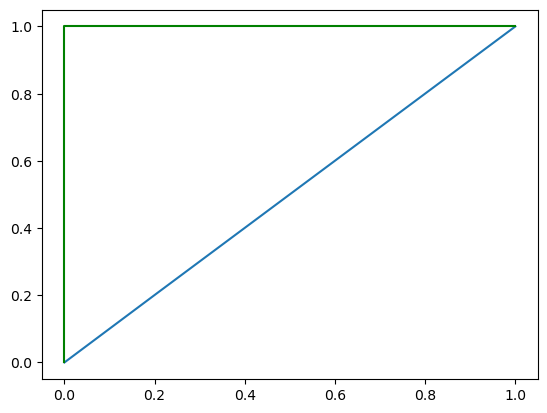

In [101]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_ns,y_train_ns)
print(knn.score(x_test,y_test))
print("Bias:",knn.score(x_train,y_train))
print("Variance:",knn.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

## Ensemble 

In [102]:
classifier_list=[DecisionTreeClassifier(),DecisionTreeClassifier(),DecisionTreeClassifier(),DecisionTreeClassifier(),DecisionTreeClassifier(),DecisionTreeClassifier(),DecisionTreeClassifier(),DecisionTreeClassifier(),DecisionTreeClassifier(),DecisionTreeClassifier()]
meta_class=LogisticRegression()
stack=StackingClassifier(classifiers=classifier_list,meta_classifier=meta_class,use_probas=True)
stack.fit(x_train_ns,y_train_ns)
stack.score(x_test,y_test)
print(stack.score(x_test,y_test))
print("Bias:",stack.score(x_train,y_train))
print("Variance:",stack.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))

0.778050778050778
Bias: 0.9999414999415
Variance: 0.778050778050778
Accuracy: 0.6515151515151515
Recall_Score: 0.206809229037704
Precision_Score 0.24321641297154203
roc_auc: 0.5003680313507136


In [103]:
x=df_new[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_new['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
ada=AdaBoostClassifier(base_estimator=LogisticRegression())
ada.fit(x_train_ns,y_train_ns)
ada.score(x_test,y_test)
print(ada.score(x_test,y_test))
print("Bias:",ada.score(x_train,y_train))
print("Variance:",ada.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))

0.7361452361452362
Bias: 0.7386509886509887
Variance: 0.7361452361452362
Accuracy: 0.6497406497406497
Recall_Score: 0.20514253773057575
Precision_Score 0.242885506287227
roc_auc: 0.4992662300355967


In [104]:
x=df_ss[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_ss['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
ada=AdaBoostClassifier(base_estimator=LogisticRegression())
ada.fit(x_train_ns,y_train_ns)
ada.score(x_test,y_test)
print(ada.score(x_test,y_test))
print("Bias:",ada.score(x_train,y_train))
print("Variance:",ada.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))

0.7345072345072345
Bias: 0.7395869895869895
Variance: 0.7345072345072345
Accuracy: 0.6526071526071526
Recall_Score: 0.1997677119628339
Precision_Score 0.22766379880873594
roc_auc: 0.4957618003068987


In [105]:
x=df_ss[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_ss['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
ada.fit(x_train_ns,y_train_ns)
ada.score(x_test,y_test)
print(ada.score(x_test,y_test))
print("Bias:",ada.score(x_train,y_train))
print("Variance:",ada.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))

0.7815315315315315
Bias: 0.9998537498537499
Variance: 0.7815315315315315
Accuracy: 0.6465328965328966
Recall_Score: 0.1949080622347949
Precision_Score 0.22799470549305095
roc_auc: 0.4925246436927325


In [106]:
from xgboost import XGBClassifier

Bias: 0.8792266292266292
Variance: 0.8381790881790881
Accuracy: 0.6502184002184003
Recall_Score: 0.20537965816755394
Precision_Score 0.24255459960291198
roc_auc: 0.49942356543675004


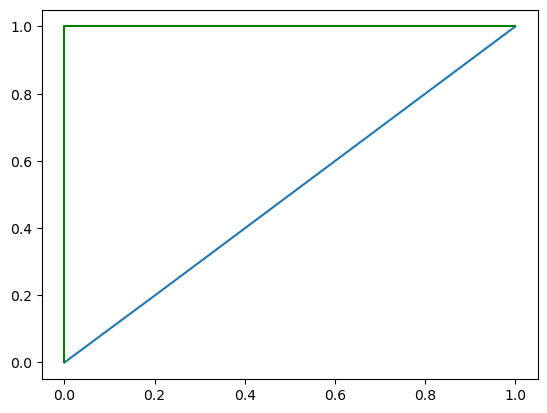

In [107]:
x=df_new[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_new['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_test,y_test)
# print(knn.score(x_test,y_test))
print("Bias:",xgb.score(x_train,y_train))
print("Variance:",xgb.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

Bias: 0.8843453843453843
Variance: 0.8346983346983347
Accuracy: 0.65001365001365
Recall_Score: 0.1953125
Precision_Score 0.22336201191264063
roc_auc: 0.4928420306359414


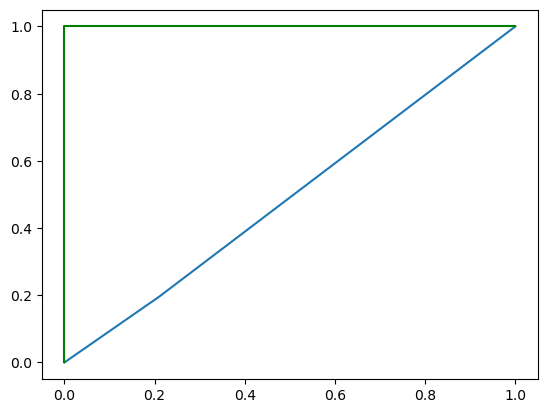

In [108]:
x=df_ss[['age','fnlwgt','educational-num','hours-per-week','workclass','education','marital-status','occupation','relationship','race','gender','native-country']]
y=df_ss['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_test,y_test)
# print(knn.score(x_test,y_test))
print("Bias:",xgb.score(x_train,y_train))
print("Variance:",xgb.score(x_test,y_test))
print("Accuracy:",accuracy_score(y_test,y_hat))
print("Recall_Score:",recall_score(y_test,y_hat))
print("Precision_Score",precision_score(y_test,y_hat))
print("roc_auc:",roc_auc_score(y_test,y_hat))
fpr,tpr,thres=roc_curve(y_test,y_hat)
plt.plot(fpr,tpr)
plt.plot([0,0,1],[0,1,1],'g-')
plt.show()

Conclusion:
1. Logistic regression with standard scaler or min max scaler can be used to predict the model
2. Model trained with annova test for normal uses 10 variables for prediction,standard scalar uses all the vairables for prediction and  with min max scaler uses 11 vairables for prediction but have slight difference in scores between them.
3. Models with PCA use 7 vairables for the prediction
4. Decision Tree and Random Forest models are under fit and thus are not the best for prediction
5. KMeans and KNN have very low accuracy and precision score.
6. few ensemble techniques shows a good score but then recall_score and precision score are not good

The accuracy for this can range between 0.70% to 0.74% using normal logistic regression,annova test and PCA